In [1]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

import community as community_louvain

In [2]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [3]:
data = r'data/alf_edgelist.csv'

df = pd.read_csv(data)
df.head()

,source,target
0,ALF (TV series),ALF (TV series)
1,ALF (TV series),ALF (character)
2,ALF (TV series),ALF: The Animated Series
3,ALF (TV series),Project ALF
4,ALF (TV series),List of ALF episodes


In [4]:
G = nx.from_pandas_edgelist(df)

G.remove_edges_from(nx.selfloop_edges(G))

In [5]:
print(nx.info(G))

Graph with 56751 nodes and 82799 edges


In [6]:
# this is network analysis network without labels; uncomment out to draw it; takes a minute

# draw_graph(G, node_size=1, show_names=False, edge_width=0.1)

# ORDER FROM CHAOS: Convert Graph to Learning Curriculum

The point of this notebook is to convert our complex "Network Science" network into a learning resource. I want to take a break from analyzing the network and use it to guide my own learning, to fill gaps in my knowlege.

I will use PageRank and Community Detection to identify knowledge "communities" that may be useful in learning. 

# PageRank - Identify Nodes of Interest

In [7]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
List of most popular given names,0.000257
Unisex name,0.000209
Given name,0.000158
Lists of United States network television schedules,0.000149
List of programs broadcast by TeenNick,0.000139
The Bear (TV series),0.000137
Lists of television programs,0.000135
List of American films of 2023,0.000133
Wright,0.000128
List of Gunsmoke (TV series) episodes,0.000125


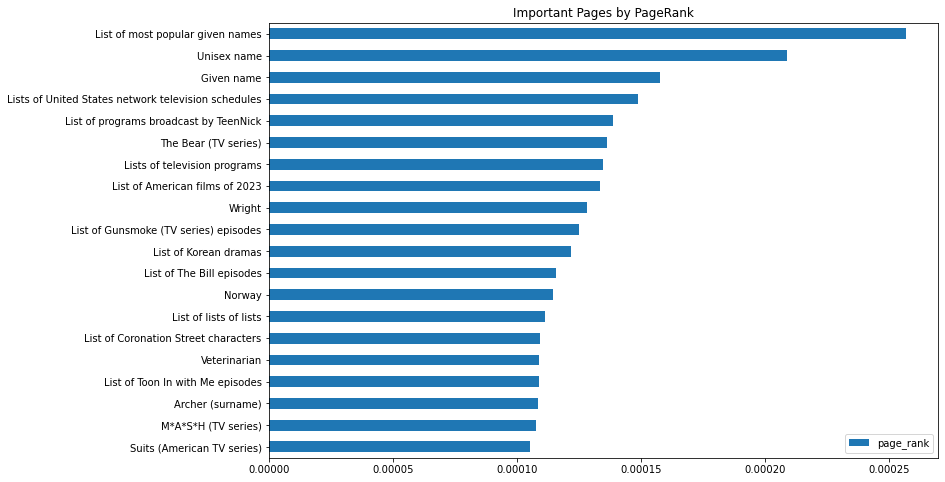

In [8]:
title = 'Important Pages by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

# Community Detection

We have one large connected component, and this will be great for use in Community Detection. The smaller connected components are communities of their own in this network, split off from the main piece of this network.

In [9]:
def draw_partition(G, partition): 

    import matplotlib.cm as cm 
    import matplotlib.pyplot as plt 

    # draw the graph 
    plt.figure(3,figsize=(12,12)) 
    pos = nx.spring_layout(G) 

    # color the nodes according to their partition 
    cmap = cm.get_cmap('jet', max(partition.values()) + 1) 
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values())) 
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3) 

    return plt.show() 

In [22]:
# identify communities; set resolution to 0.01 for smaller groups and 1 for larger groups, etc
# play with the number to get communities to the size you want them, or leave it at the default

partition = community_louvain.best_partition(G, resolution=0.001, random_state=1337) 

In [23]:
community_df = pd.DataFrame().from_dict(partition, orient='index')
community_df.reset_index(inplace=True)
community_df.columns = ['node', 'community']

# remove junk; identify relevant communities

community_df['community'].value_counts()[0:20]

577     21
4222    20
7287    20
7199    19
2986    19
929     19
1382    19
6819    19
5983    19
956     18
3139    18
6967    18
3796    17
5594    17
3381    17
5691    17
6752    17
7275    17
5100    17
6153    17
Name: community, dtype: int64

In [24]:
comm_idx = community_df['community'].value_counts()[0:20].index.values
comm_idx

array([ 577, 4222, 7287, 7199, 2986,  929, 1382, 6819, 5983,  956, 3139,
       6967, 3796, 5594, 3381, 5691, 6752, 7275, 5100, 6153], dtype=int64)

## Exploring Communities
Below, I am showing the largest community in the network. Looking at some of the node labels, I can see many instances of the word "graph". We are in the right place. 

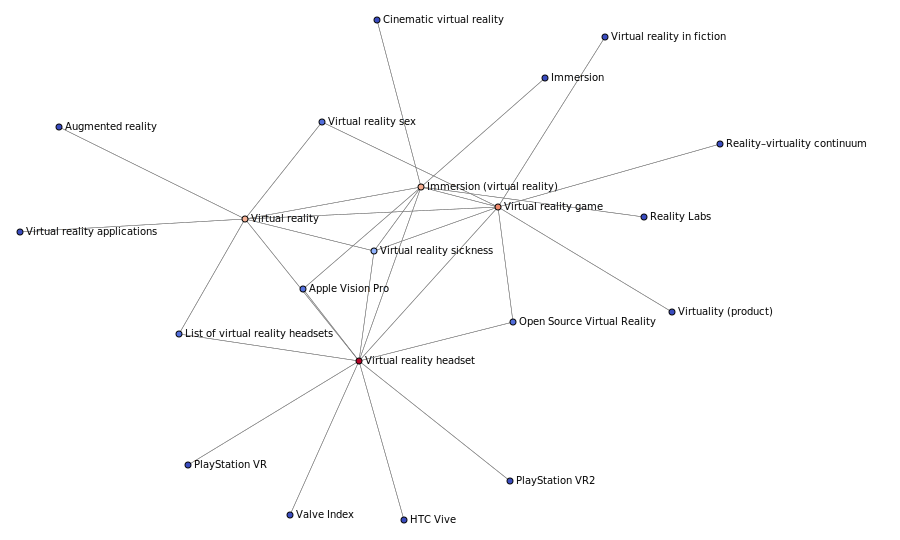

In [25]:
nodes = community_df[community_df['community']==comm_idx[0]]['node'].values

G_comm = G.subgraph(nodes)
G_net_main = G_comm.copy() # we will run community detection off of this at the end

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [26]:
netsci_nodes = [n for n in sorted(G_net_main.nodes)]
[print(n) for n in netsci_nodes]

Apple Vision Pro
Augmented reality
Cinematic virtual reality
HTC Vive
Immersion
Immersion (virtual reality)
List of virtual reality headsets
Open Source Virtual Reality
PlayStation VR
PlayStation VR2
Reality Labs
Reality–virtuality continuum
Valve Index
Virtual reality
Virtual reality applications
Virtual reality game
Virtual reality headset
Virtual reality in fiction
Virtual reality sex
Virtual reality sickness
Virtuality (product)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## More Communities!

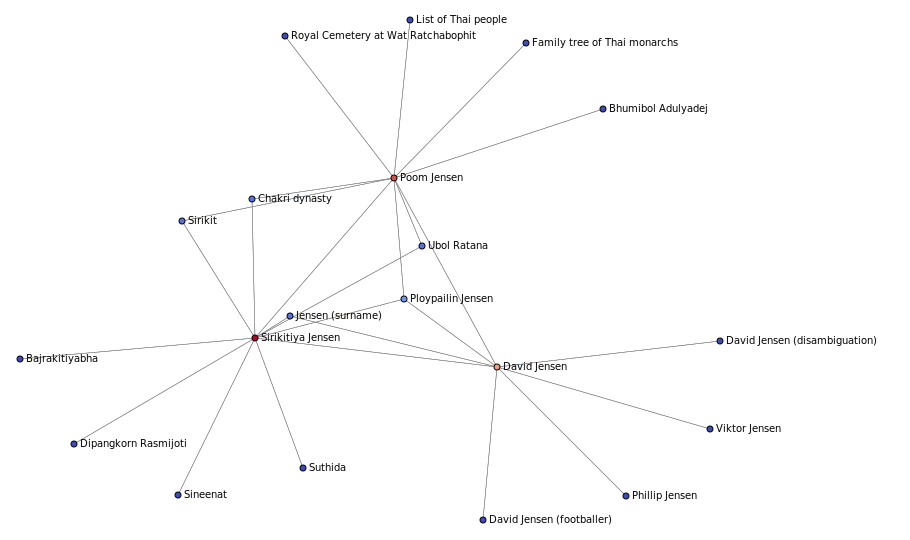

In [27]:
nodes = community_df[community_df['community']==comm_idx[1]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [28]:
[print(n) for n in sorted(G_comm.nodes)]

Bajrakitiyabha
Bhumibol Adulyadej
Chakri dynasty
David Jensen
David Jensen (disambiguation)
David Jensen (footballer)
Dipangkorn Rasmijoti
Family tree of Thai monarchs
Jensen (surname)
List of Thai people
Phillip Jensen
Ploypailin Jensen
Poom Jensen
Royal Cemetery at Wat Ratchabophit
Sineenat
Sirikit
Sirikitiya Jensen
Suthida
Ubol Ratana
Viktor Jensen


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

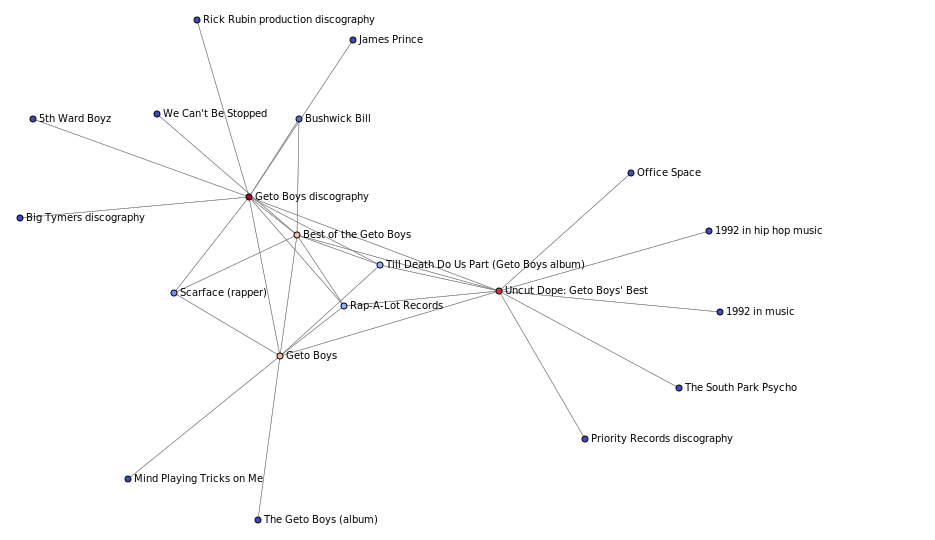

In [29]:
nodes = community_df[community_df['community']==comm_idx[2]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [30]:
[print(n) for n in sorted(G_comm.nodes)]

1992 in hip hop music
1992 in music
5th Ward Boyz
Best of the Geto Boys
Big Tymers discography
Bushwick Bill
Geto Boys
Geto Boys discography
James Prince
Mind Playing Tricks on Me
Office Space
Priority Records discography
Rap-A-Lot Records
Rick Rubin production discography
Scarface (rapper)
The Geto Boys (album)
The South Park Psycho
Till Death Do Us Part (Geto Boys album)
Uncut Dope: Geto Boys' Best
We Can't Be Stopped


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

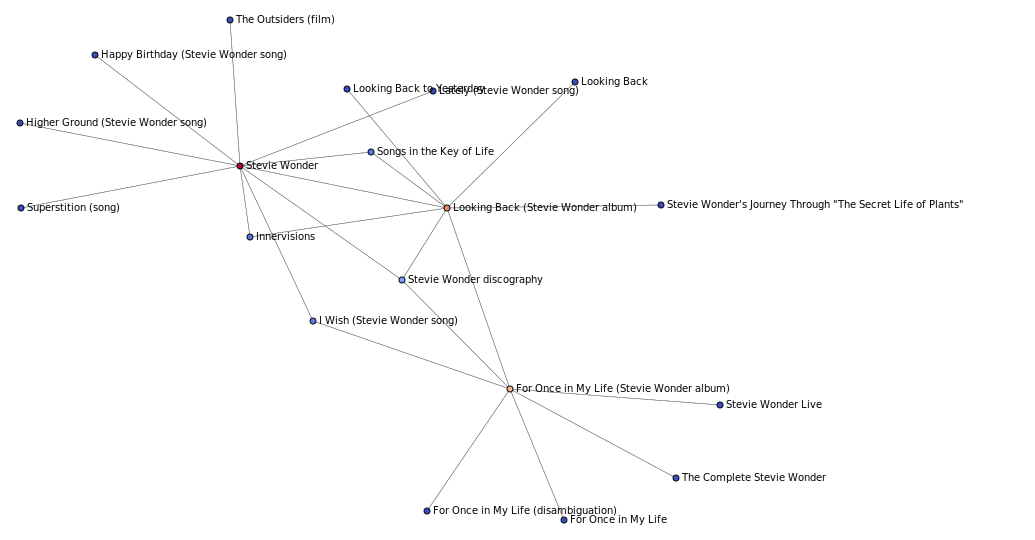

In [31]:
nodes = community_df[community_df['community']==comm_idx[3]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [32]:
[print(n) for n in sorted(G_comm.nodes)]

For Once in My Life
For Once in My Life (Stevie Wonder album)
For Once in My Life (disambiguation)
Happy Birthday (Stevie Wonder song)
Higher Ground (Stevie Wonder song)
I Wish (Stevie Wonder song)
Innervisions
Lately (Stevie Wonder song)
Looking Back
Looking Back (Stevie Wonder album)
Looking Back to Yesterday
Songs in the Key of Life
Stevie Wonder
Stevie Wonder Live
Stevie Wonder discography
Stevie Wonder's Journey Through "The Secret Life of Plants"
Superstition (song)
The Complete Stevie Wonder
The Outsiders (film)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

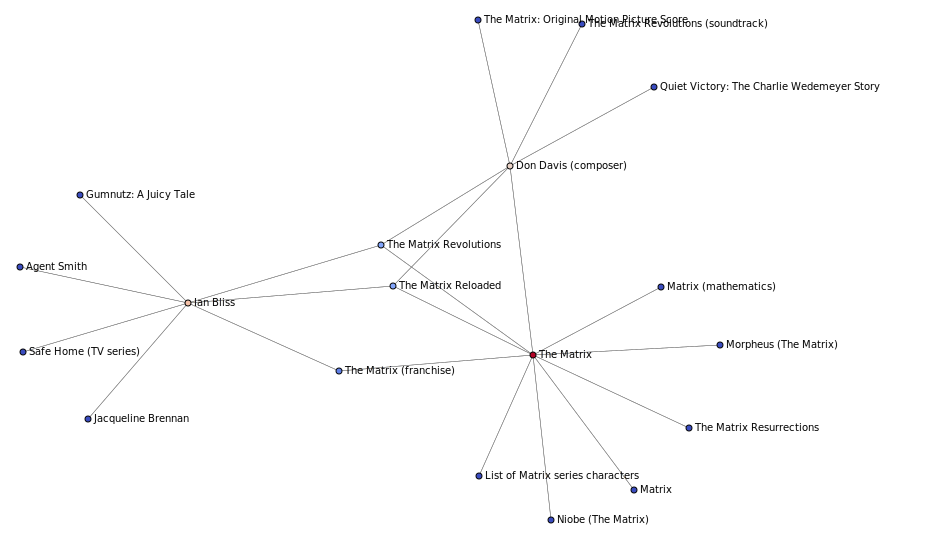

In [33]:
nodes = community_df[community_df['community']==comm_idx[4]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [34]:
[print(n) for n in sorted(G_comm.nodes)]

Agent Smith
Don Davis (composer)
Gumnutz: A Juicy Tale
Ian Bliss
Jacqueline Brennan
List of Matrix series characters
Matrix
Matrix (mathematics)
Morpheus (The Matrix)
Niobe (The Matrix)
Quiet Victory: The Charlie Wedemeyer Story
Safe Home (TV series)
The Matrix
The Matrix (franchise)
The Matrix Reloaded
The Matrix Resurrections
The Matrix Revolutions
The Matrix Revolutions (soundtrack)
The Matrix: Original Motion Picture Score


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

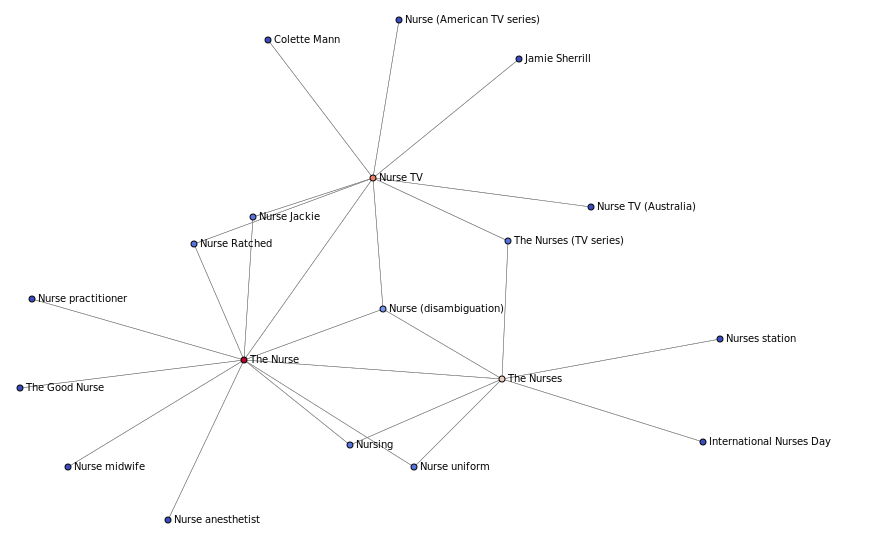

In [35]:
nodes = community_df[community_df['community']==comm_idx[5]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [36]:
[print(n) for n in sorted(G_comm.nodes)]

Colette Mann
International Nurses Day
Jamie Sherrill
Nurse (American TV series)
Nurse (disambiguation)
Nurse Jackie
Nurse Ratched
Nurse TV
Nurse TV (Australia)
Nurse anesthetist
Nurse midwife
Nurse practitioner
Nurse uniform
Nurses station
Nursing
The Good Nurse
The Nurse
The Nurses
The Nurses (TV series)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

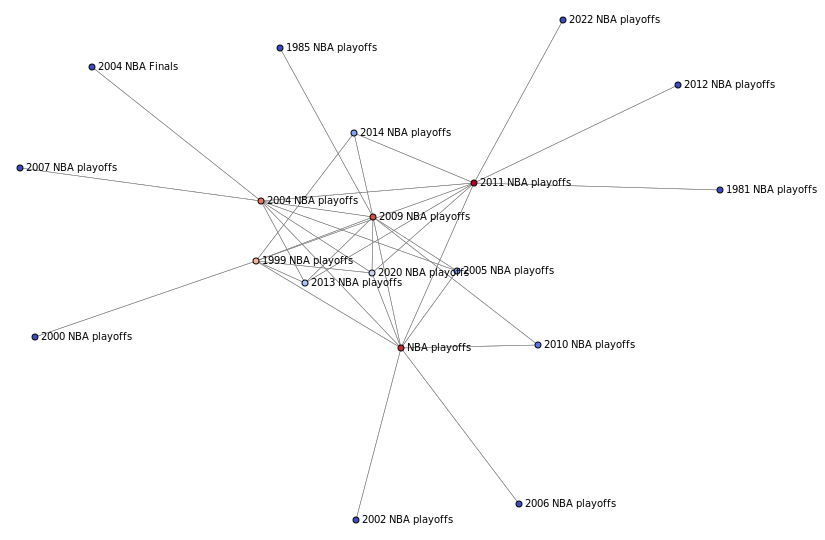

In [37]:
nodes = community_df[community_df['community']==comm_idx[6]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [38]:
[print(n) for n in sorted(G_comm.nodes)]

1981 NBA playoffs
1985 NBA playoffs
1999 NBA playoffs
2000 NBA playoffs
2002 NBA playoffs
2004 NBA Finals
2004 NBA playoffs
2005 NBA playoffs
2006 NBA playoffs
2007 NBA playoffs
2009 NBA playoffs
2010 NBA playoffs
2011 NBA playoffs
2012 NBA playoffs
2013 NBA playoffs
2014 NBA playoffs
2020 NBA playoffs
2022 NBA playoffs
NBA playoffs


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

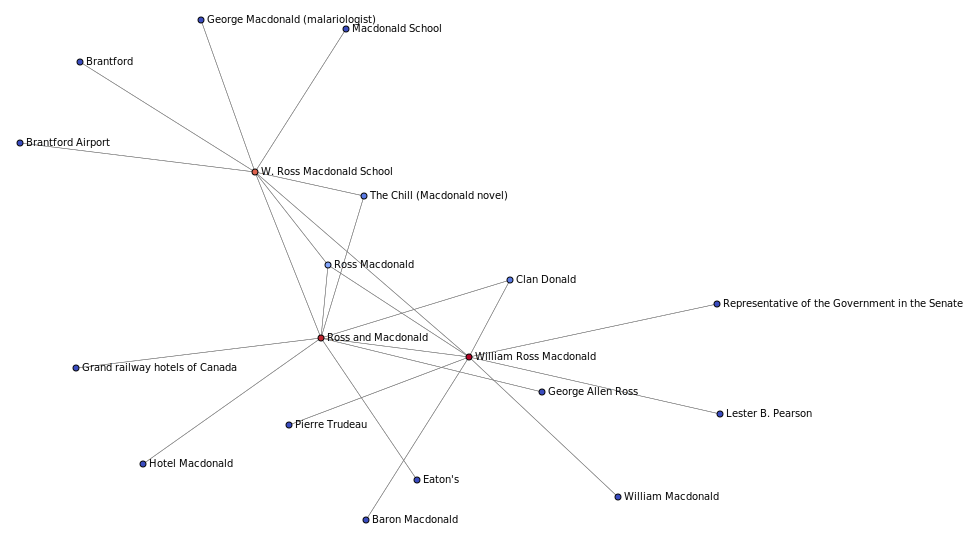

In [39]:
nodes = community_df[community_df['community']==comm_idx[7]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [40]:
[print(n) for n in sorted(G_comm.nodes)]

Baron Macdonald
Brantford
Brantford Airport
Clan Donald
Eaton's
George Allen Ross
George Macdonald (malariologist)
Grand railway hotels of Canada
Hotel Macdonald
Lester B. Pearson
Macdonald School
Pierre Trudeau
Representative of the Government in the Senate
Ross Macdonald
Ross and Macdonald
The Chill (Macdonald novel)
W. Ross Macdonald School
William Macdonald
William Ross Macdonald


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

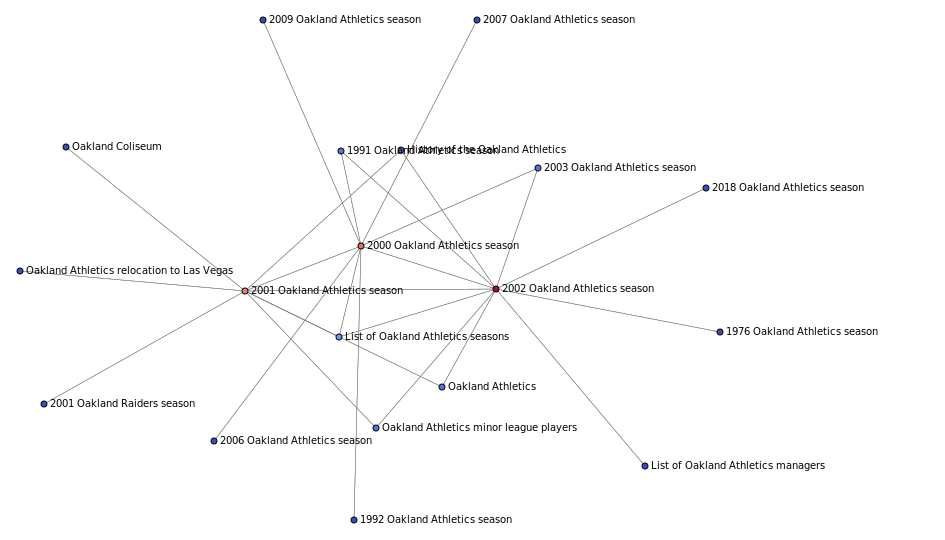

In [41]:
nodes = community_df[community_df['community']==comm_idx[8]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [42]:
[print(n) for n in sorted(G_comm.nodes)]

1976 Oakland Athletics season
1991 Oakland Athletics season
1992 Oakland Athletics season
2000 Oakland Athletics season
2001 Oakland Athletics season
2001 Oakland Raiders season
2002 Oakland Athletics season
2003 Oakland Athletics season
2006 Oakland Athletics season
2007 Oakland Athletics season
2009 Oakland Athletics season
2018 Oakland Athletics season
History of the Oakland Athletics
List of Oakland Athletics managers
List of Oakland Athletics seasons
Oakland Athletics
Oakland Athletics minor league players
Oakland Athletics relocation to Las Vegas
Oakland Coliseum


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

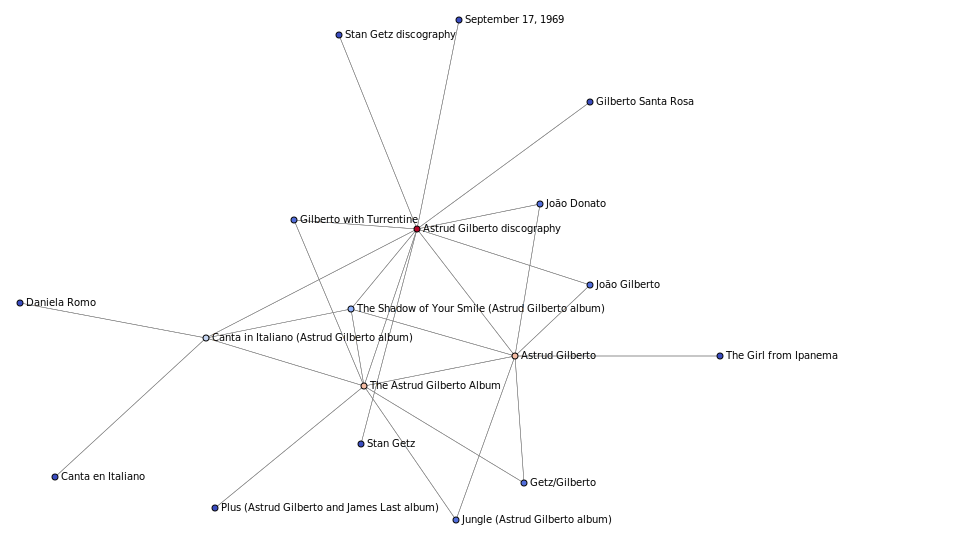

In [43]:
nodes = community_df[community_df['community']==comm_idx[9]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [44]:
[print(n) for n in sorted(G_comm.nodes)]

Astrud Gilberto
Astrud Gilberto discography
Canta en Italiano
Canta in Italiano (Astrud Gilberto album)
Daniela Romo
Getz/Gilberto
Gilberto Santa Rosa
Gilberto with Turrentine
João Donato
João Gilberto
Jungle (Astrud Gilberto album)
Plus (Astrud Gilberto and James Last album)
September 17, 1969
Stan Getz
Stan Getz discography
The Astrud Gilberto Album
The Girl from Ipanema
The Shadow of Your Smile (Astrud Gilberto album)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [45]:
sorted(G.nodes)

['"Heroes" (David Bowie album)',
 '"Heroes" (David Bowie song)',
 '"I AM" Activity',
 '"Superstar" Billy Graham',
 '"The Above Ground Sound" of Jake Holmes',
 '"V" device',
 '"Weird Al" Yankovic',
 '"Weird Al" Yankovic (album)',
 '"Weird Al" Yankovic in 3-D',
 '"Y" Is for Yesterday',
 '$h*! My Dad Says',
 "'03 Bonnie & Clyde",
 "'Orrible",
 "'Til Death",
 "'Til Death Do Us Part (Star Trek: Deep Space Nine)",
 "'Til Death Do Us Part (film)",
 "'Til Death Do Us Unite",
 "'Tis",
 "'Twas the Night",
 "(Don't Fear) The Reaper",
 '(G)I-dle discography',
 '(Hey You) The Rock Steady Crew',
 '(Hydroxyethyl)methacrylate',
 "(I Don't Know Why) But I Do",
 "(I Think I'm Over) Getting Over You",
 "(I'm Gonna) Love Me Again",
 '(Just Like) Starting Over',
 '(Love Is) Thicker Than Water',
 '(Rap) Superstar',
 '(Rock) Superstar',
 '(The Man Who Shot) Liberty Valance',
 "(There's) Always Something There to Remind Me",
 '(You Gotta) Fight for Your Right (To Party!)',
 '(You Make Me Feel Like) A Natural 

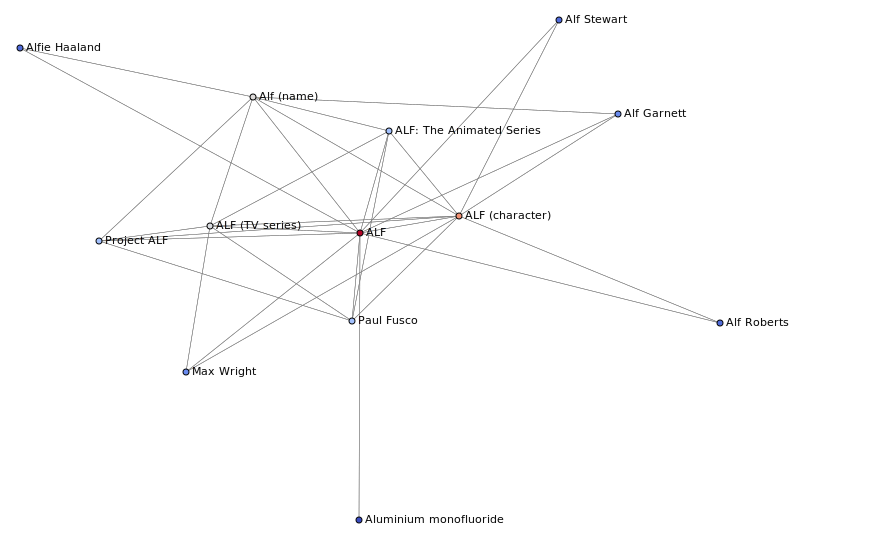

In [46]:
ego = nx.ego_graph(G, 'ALF')

draw_graph(ego, show_names=True, node_size=3, font_size=11)

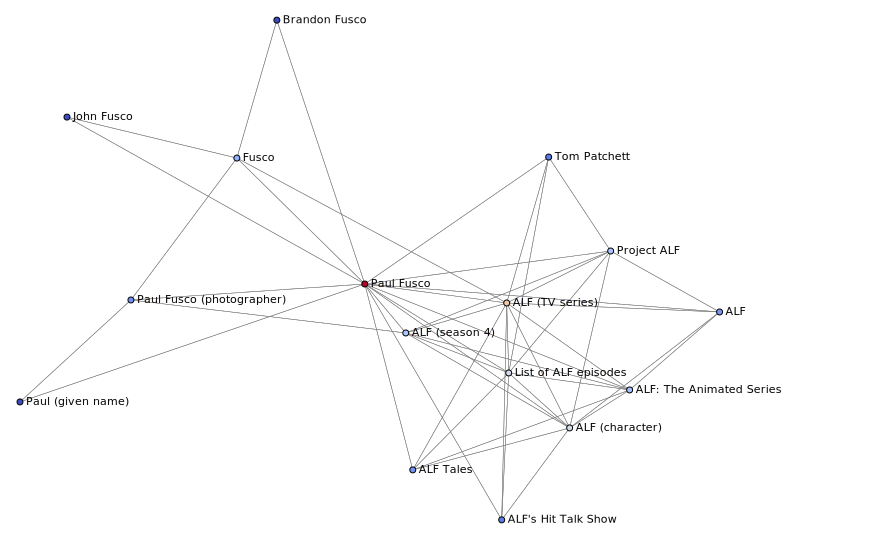

In [47]:
ego = nx.ego_graph(G, 'Paul Fusco')

draw_graph(ego, show_names=True, node_size=3, font_size=11)

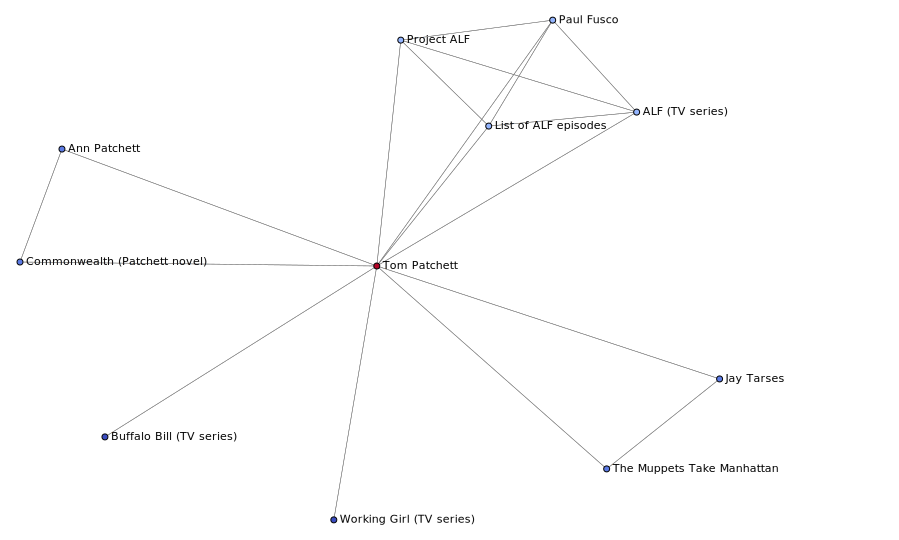

In [48]:
ego = nx.ego_graph(G, 'Tom Patchett', radius=1)

draw_graph(ego, show_names=True, node_size=3, font_size=11)

In [49]:
# ego = nx.ego_graph(G, 'Tom Patchett', radius=2)

# draw_graph(ego, show_names=False, node_size=3, font_size=11)